In [1]:
import tensorflow as tf
import numpy as np


2024-11-28 22:38:52.632992: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

# Funciones auxiliares (proporcionadas por ti)
def is_winner(board, player):
    """Comprueba si un jugador ha ganado."""
    winning_positions = [
        [0, 1, 2], [3, 4, 5], [6, 7, 8],  # Filas
        [0, 3, 6], [1, 4, 7], [2, 5, 8],  # Columnas
        [0, 4, 8], [2, 4, 6]              # Diagonales
    ]
    return any(all(board[pos] == player for pos in line) for line in winning_positions)


In [3]:

def generate_boards(board, current_player, next_player):
    """
    Genera todos los posibles tableros desde un estado inicial,
    asignando recompensas para cada movimiento.
    """
    boards = []
    if is_winner(board, 1) or is_winner(board, -1) or 0 not in board:
        reward = [1 if board[i] == 0 and is_winner(board[:i] + [1] + board[i+1:], 1) else
                  -1 if board[i] == 0 and is_winner(board[:i] + [-1] + board[i+1:], -1) else
                  0 for i in range(9)]
        return [(board[:], reward)]
    
    for i in range(9):
        if board[i] == 0:
            board[i] = current_player
            boards.extend(generate_boards(board, next_player, current_player))
            board[i] = 0  # Restaurar estado previo
    return boards


In [4]:


def data_generator():
    """Genera los datos de entrenamiento iniciales."""
    initial_board = [0] * 9
    return generate_boards(initial_board, 1, -1)


In [5]:

# Generar datos
print("Generando datos de entrenamiento...")
data = data_generator()
print(f"Datos generados: {len(data)} ejemplos.")


Generando datos de entrenamiento...
Datos generados: 255168 ejemplos.


In [6]:

# Convertir datos a formato NumPy
X = np.array([d[0] for d in data], dtype=np.float32)  # Tableros
y = np.array([d[1] for d in data], dtype=np.float32)  # Recompensas


In [7]:

# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(9,)),       # Entrada: estado del tablero (9 casillas)
    tf.keras.layers.Dense(64, activation="relu"),  # Capa oculta
    tf.keras.layers.Dense(64, activation="relu"),  # Otra capa oculta
    tf.keras.layers.Dense(9, activation="linear")  # Salida: valores Q para cada casilla
])


2024-11-28 22:38:59.168470: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="mse",  # Error cuadrático medio
              metrics=["mae"])


In [9]:

# Entrenar el modelo
print("Entrenando el modelo...")
history = model.fit(X, y, epochs=10, batch_size=32, verbose=1)


Entrenando el modelo...
Epoch 1/10
7974/7974 [==============================] - 12s 1ms/step - loss: 0.0234 - mae: 0.0786
Epoch 2/10
7974/7974 [==============================] - 10s 1ms/step - loss: 0.0093 - mae: 0.0495
Epoch 3/10
7974/7974 [==============================] - 10s 1ms/step - loss: 0.0067 - mae: 0.0436
Epoch 4/10
7974/7974 [==============================] - 13s 2ms/step - loss: 0.0051 - mae: 0.0400
Epoch 5/10
7974/7974 [==============================] - 9s 1ms/step - loss: 0.0039 - mae: 0.0370
Epoch 6/10
7974/7974 [==============================] - 9s 1ms/step - loss: 0.0032 - mae: 0.0346
Epoch 7/10
7974/7974 [==============================] - 11s 1ms/step - loss: 0.0027 - mae: 0.0326
Epoch 8/10
7974/7974 [==============================] - 12s 1ms/step - loss: 0.0024 - mae: 0.0309
Epoch 9/10
7974/7974 [==============================] - 16s 2ms/step - loss: 0.0021 - mae: 0.0297
Epoch 10/10
7974/7974 [==============================] - 11s 1ms/step - loss: 0.0019 - mae: 0.02

1/1 [==============================] - 0s 11ms/step
Predicción para el tablero de prueba:
[[-0.46705616 -0.18969421  0.44159538 -0.71325517 -0.2034868   0.3060792
  -0.2345058   0.02126077  0.34192568]]


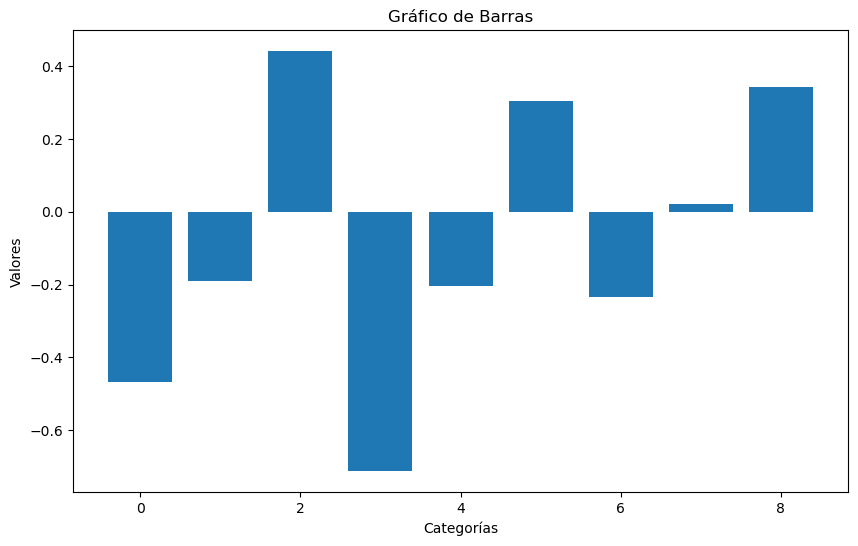

In [19]:
# Probar el modelo
test_board = [0,  1,  -1,
              0,  0,  1,
              -1, -1,  1]  # Estado de prueba
prediction = model.predict(np.array([test_board]))
print("Predicción para el tablero de prueba:")
print(prediction)


import matplotlib.pyplot as plt


# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
plt.bar(range(len(prediction[0])), prediction[0])

# Personalizar el gráfico
plt.xlabel('Categorías')  # Puedes cambiar este label por nombres más descriptivos si los tienes
plt.ylabel('Valores')
plt.title('Gráfico de Barras')

# Mostrar el gráfico
plt.show()

